### In Progress...

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.arima_model import ARIMA

pd.set_option("display.max_columns", 101)

In [3]:
first_product = pd.read_pickle("./HOBBIES_1_001_feature.pkl")
first_product.tail()

,store_id,day_number,units_sold,sell_price,snap,units_lag_28,units_rolling_7,units_rolling_28,units_rolling_49,sell_price_diff,dept_id_FOODS_1,dept_id_FOODS_2,dept_id_FOODS_3,dept_id_HOBBIES_1,dept_id_HOBBIES_2,dept_id_HOUSEHOLD_1,dept_id_HOUSEHOLD_2,store_id_CA_1,store_id_CA_2,store_id_CA_3,store_id_CA_4,store_id_TX_1,store_id_TX_2,store_id_TX_3,store_id_WI_1,store_id_WI_2,store_id_WI_3,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,event_type_1_Cultural,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,event_type_2_Cultural,event_type_2_Religious
19405,TX_2,1941,NaN,8.257812,0,0.0,0.142822,0.285645,0.306152,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
19406,TX_3,1941,NaN,8.257812,0,0.0,0.000000,0.321533,0.408203,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
19407,WI_1,1941,NaN,8.382812,0,1.0,0.714355,0.392822,0.408203,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
19408,WI_2,1941,NaN,8.382812,0,1.0,0.142822,0.250000,0.163208,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
19409,WI_3,1941,NaN,8.382812,0,0.0,0.000000,0.107117,0.163208,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
first_product_train = first_product[first_product.day_number.astype(int) <= 1885].reset_index(drop=True) # 1913-28
first_product_validation = first_product[(first_product.day_number.astype(int) > 1885)
                                         & (first_product.day_number.astype(int) < 1914)].reset_index(drop=True)
first_product_test = first_product[first_product.day_number.astype(int) >= 1914].reset_index(drop=True)
first_product_validation_y = first_product_validation.units_sold

## Moving average


In [15]:
# Assigning weights to moving averrage columns
weighted_moving_average = (0.55*first_product_validation['units_rolling_49']) + \
                          (0.3*first_product_validation['units_rolling_28']) + \
                          (0.15*first_product_validation['units_rolling_7'])
moving_average_preds = np.round(weighted_moving_average.values)
moving_average_preds

array([1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0.

In [16]:
np.sqrt(mean_squared_error(first_product_validation_y.values, moving_average_preds))

0.847

In [ ]:
# Exponential smoothing

## ARIMA (In Progress....)

Store: CA_1


/home/asif/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


predicted=1.000000, expected=1.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=4.000000
predicted=1.000000, expected=2.000000
predicted=1.000000, expected=3.000000
predicted=2.000000, expected=0.000000
predicted=1.000000, expected=1.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=3.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=3.000000
predicted=2.000000, expected=0.000000
predicted=1.

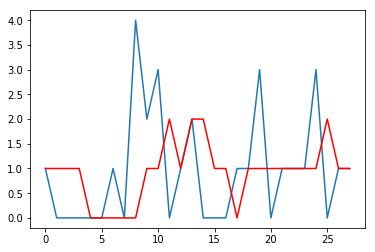

Store: CA_2


/home/asif/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


predicted=1.000000, expected=0.000000
predicted=1.000000, expected=3.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=2.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.000000, expected=2.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=4.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=1.

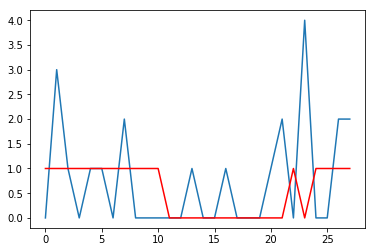

Store: CA_3


/home/asif/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


predicted=2.000000, expected=2.000000
predicted=2.000000, expected=1.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=4.000000
predicted=1.000000, expected=2.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=2.000000
predicted=2.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=2.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=2.000000
predicted=0.000000, expected=4.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=2.000000, expected=0.000000
predicted=1.

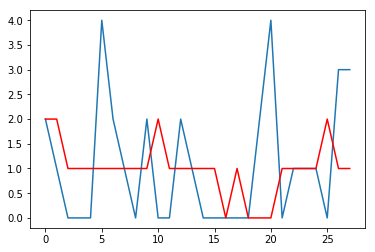

Store: CA_4


/home/asif/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


predicted=1.000000, expected=2.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=2.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=3.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=

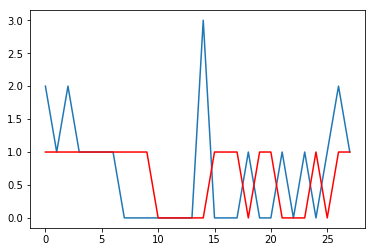

Store: TX_1


/home/asif/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


predicted=0.000000, expected=1.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=1.000000
predicted=0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0

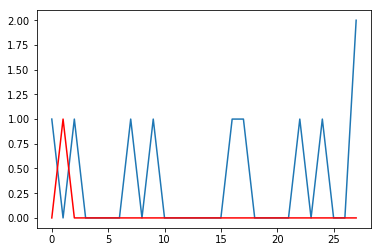

Store: TX_2


/home/asif/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


predicted=0.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=2.000000


/home/asif/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
Test RMSE: 0.707


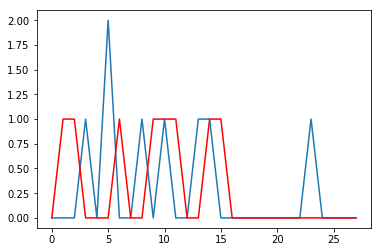

Store: TX_3


/home/asif/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


predicted=1.000000, expected=0.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=3.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=-0

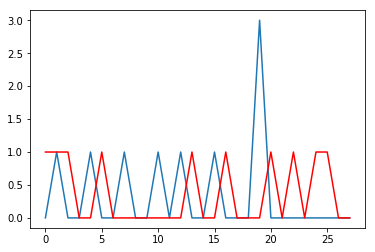

Store: WI_1


/home/asif/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


predicted=1.000000, expected=0.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=2.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=1.000000, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=1.000000
predicted=0.000000, expected=2.000000
predic

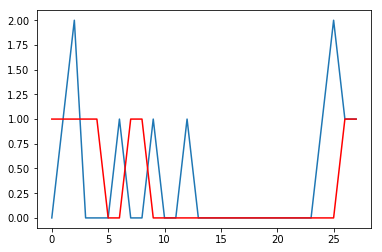

Store: WI_2


/home/asif/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=1.000000
predicted=0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.000000, expected=1.000000
predicted=1.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=

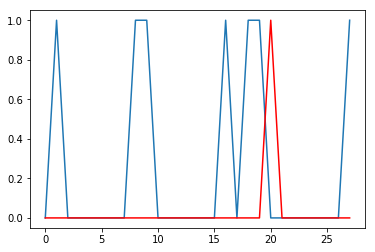

Store: WI_3
predicted=0.000000, expected=0.000000


/home/asif/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


predicted=0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=1.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
pred

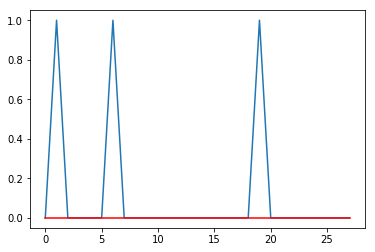

In [31]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

unique_stores = first_product.store_id.unique()
for s in unique_stores:
    print('Store: '+ s)
    arima_train = first_product_train[first_product_train.store_id == s].units_sold.values
    arima_val = first_product_validation[first_product_train.store_id == s].units_sold.values
    history = [x for x in arima_train]

    arima_preds = list()
    for t in range(len(arima_val)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = np.round(output[0])
        arima_preds.append(yhat)
        obs = arima_val[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    error = np.sqrt(mean_squared_error(arima_val, arima_preds))
    print('Test RMSE: %.3f' % error)
    # plot
    plt.plot(arima_val)
    plt.plot(arima_preds, color='red')
    plt.show()

## Prophet